# Proyecto de Análisis de la empresa ICE del año 2016

En el siguiente análisis, presentaremos información de la tienda online Ice que vende videojuegos por todo el mundo. 
Los datos se centran en las reseñas de usuarios y expertos, los géneros, las plataformas y los datos históricos sobre las ventas de juegos. 

El objetivo de nuestro análisis es determinar el mejor enfoque para la campaña publicitaria para el año 2017. 

Vamos a realizar nuestro análisis, primero preparando y limpiando nuestros datos, identificando duplicados, ausentes y sustituyendo cuando creamos conveniente. 

Analizaremos nuestros datos por año, plataforma y en un periodo relevante, según ventas por regiones, géneros y reseñas. 

## Preparación de los datos 

### Cargar datos

In [1]:
# Cargamos todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
# Cargamos el dataset
df_games = pd.read_csv('/datasets/games.csv', header='infer')

La descripción de nuestros datos:
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Rating (ESRB)


In [3]:
# Imprimimos información general del DataFrame y verificamos por filas duplicadas
df_games.info()
print(df_games.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
0


#### Observaciones
* Notamos que no tenemos filas completamente duplicadas
* Contamos con 6 columnas con valores ausentes, **Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating**
* Cambiaremos los nombres de las columnas a minúsculas para evitar errores futuros de referencia. 
* Cambiaremos el tipo de valor de **Year_of_Release, User_Score y Rating**

In [4]:
# Cambiamos los nombres de las columnas a minúsculas 
new_col_names = []
for old_name in df_games.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)
df_games.columns = new_col_names
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### Valores Duplicados

In [5]:
# Buscamos que no haya duplicados en la columna de name, sería la única a verificar
print(df_games.duplicated(subset=['name']).sum()) 

5155


In [6]:
# Eliminamos los espacios al inicio de los nombres y buscamos duplicados
df_games['name'] = df_games['name'].str.strip()
print(df_games['name'].value_counts(dropna=False))

Need for Speed: Most Wanted                 12
Madden NFL 07                                9
LEGO Marvel Super Heroes                     9
FIFA 14                                      9
Ratatouille                                  9
                                            ..
Warcraft III: Reign of Chaos                 1
Etrian Mystery Dungeon                       1
Fullmetal Alchemist and the Broken Angel     1
Namco Museum Vol.5                           1
Driving Simulator 2011                       1
Name: name, Length: 11560, dtype: int64


In [7]:
# Hacemos la prueba con el juego que más se repite
print(df_games[df_games['name'] == 'Need for Speed: Most Wanted'])

                              name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
1998   Need for Speed: Most Wanted       XB           2005.0  Racing   
2048   Need for Speed: Most Wanted      PSV           2012.0  Racing   
3581   Need for Speed: Most Wanted       GC           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
6273   Need for Speed: Most Wanted     WiiU           2013.0  Racing   
6410   Need for Speed: Most Wanted       DS           2005.0  Racing   
6473   Need for Speed: Most Wanted      GBA           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

#### Observaciones
* Notamos que a pesar de tener 5155 duplicados en los nombres, es debido a que se presentan en diferentes plataformas y diferentes años, por lo que por el momento no eliminaremos filas

### Valores Ausentes

#### Columna 'name'

In [8]:
# Verificamos los valores ausentes por columna
print(df_games[df_games['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [9]:
# Sustituimos los valores ausentes en 'name' por cadenas vacías
df_games['name'] = df_games['name'].fillna('')
print(df_games[df_games['name'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


#### Columna 'genre'

In [10]:
# Verificamos los valores ausentes por columna
print(df_games[df_games['genre'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659             GEN           1993.0   NaN      1.78      0.53      0.00   
14244           GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [11]:
# Sustituimos los valores ausentes en 'genre' por cadenas vacías
df_games['genre'] = df_games['genre'].fillna('')
print(df_games[df_games['genre'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


#### Columna 'rating'

In [12]:
# Verificamos los valores ausentes por columna
print(df_games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [13]:
# Sustituimos los valores ausentes por cadenas vacías
df_games['rating'] = df_games['rating'].fillna('')
print(df_games['rating'].unique())

['E' '' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


#### Columna 'year_of_release'

In [14]:
# Convertimos la columna de 'year_of_release' al tipo datetime
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format = '%Y')
df_games['year_of_release'] = pd.DatetimeIndex(df_games['year_of_release']).year
print(df_games['year_of_release'])

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64


In [15]:
# Identificamos que de los valores ausentes en los años, corresponden al mismo juego
print(df_games[df_games['name'] == 'Call of Duty: Black Ops'])

                         name platform  year_of_release    genre  na_sales  \
32    Call of Duty: Black Ops     X360           2010.0  Shooter      9.70   
41    Call of Duty: Black Ops      PS3           2010.0  Shooter      5.99   
1131  Call of Duty: Black Ops       PC              NaN  Shooter      0.58   
1412  Call of Duty: Black Ops      Wii           2010.0  Shooter      0.80   
3439  Call of Duty: Black Ops       DS           2010.0  Shooter      0.50   

      eu_sales  jp_sales  other_sales  critic_score user_score rating  
32        3.68      0.11         1.13          87.0        6.3      M  
41        4.37      0.48         1.79          88.0        6.4      M  
1131      0.81      0.00         0.23          81.0        5.2      M  
1412      0.45      0.00         0.12          80.0        5.8      M  
3439      0.04      0.00         0.04          74.0          6      T  


In [16]:
# Reemplazamos todos los valores ausentes con el mismo año con el que correspondia al mismo videojuego
df_games['year_of_release'] = df_games.groupby('name')['year_of_release'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
print(df_games[df_games['year_of_release'].isna()])

                                           name platform  year_of_release  \
475                  wwe Smackdown vs. Raw 2006      PS2              NaN   
627                                   Rock Band     X360              NaN   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
805                                   Rock Band      Wii              NaN   
1142                                  Rock Band      PS3              NaN   
...                                         ...      ...              ...   
16277           Homeworld Remastered Collection       PC              NaN   
16288                                    Shorts       DS              NaN   
16348              Agarest Senki: Re-appearance      PS3              NaN   
16458               Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                              Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_scor

In [17]:
# Comprobamos con uno de los nombres con valor ausente que en ninguna plataforma contamos con el año
print(df_games[df_games['name'] == 'Rock Band'])

           name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
627   Rock Band     X360              NaN  Misc      1.93      0.33       0.0   
805   Rock Band      Wii              NaN  Misc      1.33      0.56       0.0   
1142  Rock Band      PS3              NaN  Misc      0.99      0.41       0.0   
1840  Rock Band      PS2              NaN  Misc      0.71      0.06       0.0   

      other_sales  critic_score user_score rating  
627          0.21          92.0        8.2      T  
805          0.20          80.0        6.3      T  
1142         0.22          92.0        8.4      T  
1840         0.35          82.0        6.8      T  


In [18]:
# Sacamos la media y la mediana del año, el valor mínimo, máximo y contamos los valores de cada año
year_avg = df_games['year_of_release'].mean()
year_median = df_games['year_of_release'].median()
year_min = df_games['year_of_release'].min()
year_max = df_games['year_of_release'].max()
print(df_games['year_of_release'].value_counts(dropna=False))
print()
print('El promedio es:', year_avg)
print('La mediana es:', year_median)
print('El año mínimo es:', year_min)
print('El año máximo es:', year_max)

2008.0    1441
2009.0    1430
2010.0    1271
2007.0    1202
2011.0    1153
2006.0    1020
2005.0     947
2002.0     845
2003.0     784
2004.0     764
2012.0     662
2015.0     606
2014.0     582
2013.0     547
2016.0     502
2001.0     485
1998.0     379
2000.0     350
1999.0     339
1997.0     289
1996.0     263
1995.0     219
NaN        146
1994.0     122
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

El promedio es: 2006.489468284145
La mediana es: 2007.0
El año mínimo es: 1980.0
El año máximo es: 2016.0


Gracias a los datos anteriores, decidimos en sustituir los datos ausentes restantes con el valor de la media 2006, teniendo en cuenta que no afecta en gran porcentaje el cambio de cantidad del año 2006:
* Valores actuales: representan un 6.1%
* Al agregar 146 valores: representaría un 6.9%

In [19]:
# Reemplazamos los valores ausentes
df_games['year_of_release'] = df_games['year_of_release'].fillna(2006)
print(df_games['year_of_release'].value_counts(dropna=False))

2008.0    1441
2009.0    1430
2010.0    1271
2007.0    1202
2006.0    1166
2011.0    1153
2005.0     947
2002.0     845
2003.0     784
2004.0     764
2012.0     662
2015.0     606
2014.0     582
2013.0     547
2016.0     502
2001.0     485
1998.0     379
2000.0     350
1999.0     339
1997.0     289
1996.0     263
1995.0     219
1994.0     122
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64


#### Columna 'critic_score'

In [20]:
# Sacamos la media y la mediana del año, el valor mínimo, máximo y contamos los valores 
critic_avg = df_games['critic_score'].mean()
critic_median = df_games['critic_score'].median()
critic_min = df_games['critic_score'].min()
critic_max = df_games['critic_score'].max()
print(df_games['critic_score'].value_counts(dropna=False).head(20))
print()
print('El promedio es:', critic_avg)
print('La mediana es:', critic_median)
print('El mínimo es:', critic_min)
print('El máximo es:', critic_max)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
73.0     238
80.0     237
76.0     235
72.0     226
74.0     226
77.0     225
68.0     219
79.0     218
81.0     218
69.0     215
82.0     208
83.0     206
66.0     203
65.0     192
84.0     183
Name: critic_score, dtype: int64

El promedio es: 68.96767850559173
La mediana es: 71.0
El mínimo es: 13.0
El máximo es: 98.0


In [21]:
# Reemplazamos los valores ausentes 
df_games['critic_score'] = df_games['critic_score'].fillna('')
print(df_games['critic_score'].value_counts(dropna=False))

        8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
17.0       1
21.0       1
22.0       1
13.0       1
Name: critic_score, Length: 83, dtype: int64


#### Columna 'user_score'

In [22]:
# Identificamos los valores TBD
print(df_games[df_games['user_score'] == 'tbd'])

                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA           2006.0   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales critic_score  

In [23]:
# Hacemos los calculos en un DataFrame de prueba para sustituir los ausentes
df_games2 = df_games.copy()
df_games2['user_score'] = df_games2['user_score'].fillna('')
df_games2['user_score'] = pd.to_numeric(df_games2['user_score'], errors='coerce')
user_avg2 = df_games2['user_score'].mean()
user_median2 = df_games2['user_score'].median()
user_min2 = df_games2['user_score'].min()
user_max2 = df_games2['user_score'].max()
print(df_games2['user_score'].value_counts(dropna=False).head(20))
print()
print('El promedio es:', user_avg2)
print('La mediana es:', user_median2)
print('El mínimo es:', user_min2)
print('El máximo es:', user_max2)

NaN    9125
7.8     324
8.0     290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7.0     220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
Name: user_score, dtype: int64

El promedio es: 7.125046113306982
La mediana es: 7.5
El mínimo es: 0.0
El máximo es: 9.7


In [24]:
#Sustituimos los valores ausentes por la media 
df_games['user_score'] = df_games['user_score'].fillna('7.5')
print(df_games['user_score'].value_counts(dropna=False).head(20))

7.5    6952
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7       220
7.6     220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
Name: user_score, dtype: int64


#### Observaciones
* En la columna **'name'** sustituimos los valores ausentes por cadenas vacías ya que desconocemos el nombre de los juegos, al ser las mimas filas, de igual forma, desconcemos el género. Probablemente es un juego no muy popular y conocido solo en Japón por lo que el nombre no se pudo traducir. 
* En la columna de **'rating'** también lo hicimos por cadenas vacías, ya que desconocemos a qué categoría pertenecen, probablemente es una clasificación que no fue otorgada según la plataforma.
* En la columna de **'year_of_release'**, identificamos que algunos de los valores ausentes el mismo videojuego, se podían reemplazar con el mismo año pero de otra plataforma. Gracias a los datos estadísticos, decidimos en sustituir los datos ausentes restantes con el valor de la media 2006, teniendo en cuenta que no afecta en gran porcentaje el cambio de cantidad del año 2006:
    * Valores actuales: representan un 6.1%
    * Al agregar 146 valores: representaría un 6.9%
* En la columna de **'critic_score'** hemos decidido dejar en cadenas vacías, ya que los ausentes representan el 51% por lo que podría representar un cambio significativo en el análisis. 
* Finalmente en la columna de **'user_score'** al tener valores TBD (to be determined) no cambiamos los valores a enteros, sino que creamos un DataFrame de prueba para sacar el promedio, hemos decidido sustituir los valores por la mediana para los 6701 valores ausentes debido a que tebemos una distribución sesgada. Asumimos que los valores TBD es porque la reseña está en proceso de verificación. 
* Tanto para **'critic_score'** como para **'user_score'** basándonos en el ejemplo del juego 'Need for Speed: Most Wanted' Probablemente sólo se evualuó en ciertas plataformas o no todas las plataformas tienen la opción de dar reseñas.

### Ventas Totales

In [25]:
# Creamos una nueva columna 'total_sales' donde sumamos todas las ventas por juego 
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games.head(10))

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales critic_score user_score rating  \
0     41.36     28.96      3.77         8.45         76.0          8      E   
1     29.08      3.58      6.81         0.77     

## Análisis de Datos 

### Análisis por año

In [26]:
# Contamos los juegos lanzados por año
games_by_year = df_games.groupby('year_of_release')[['name']].count()
print(games_by_year)
print(games_by_year.mean())

                 name
year_of_release      
1980.0              9
1981.0             46
1982.0             36
1983.0             17
1984.0             14
1985.0             14
1986.0             21
1987.0             16
1988.0             15
1989.0             17
1990.0             16
1991.0             41
1992.0             43
1993.0             62
1994.0            122
1995.0            219
1996.0            263
1997.0            289
1998.0            379
1999.0            339
2000.0            350
2001.0            485
2002.0            845
2003.0            784
2004.0            764
2005.0            947
2006.0           1166
2007.0           1202
2008.0           1441
2009.0           1430
2010.0           1271
2011.0           1153
2012.0            662
2013.0            547
2014.0            582
2015.0            606
2016.0            502
name    451.756757
dtype: float64


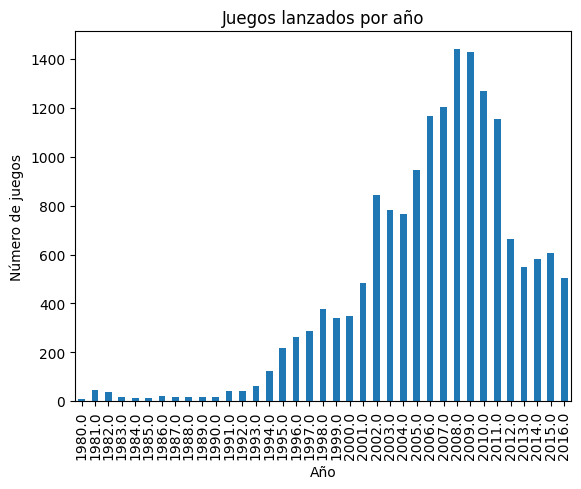

In [27]:
# Realizamos gráfico de barras para visualizar los datos 
games_by_year.plot(y= 'name',
                   title= 'Juegos lanzados por año',
                   xlabel= 'Año',
                   ylabel= 'Número de juegos',
                   kind= 'bar',
                   legend= False)
plt.show()
                   

**Observaciones**

* Notamos que de los años 80s al 93 se lanzaron menos de 100 juegos al año. 
* Los años en los que se lanzaron más juegos nuevos fue del 2006 al 2011, siendo en 2008 en el que se lanzaron un total de 1441. 
* El promedio de juegos lanzados por año es de 451 juegos.

### Análisis por plataforma

In [28]:
# Obtenemos las ventas totales por plataforma
platform_games = df_games.groupby('platform')[['total_sales']].sum()
platform_games = platform_games.reset_index()
print(platform_games.sort_values(by='total_sales', ascending=False))
print(platform_games.mean())

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        30.77
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03
total_sales    287.603548
dtype: float64


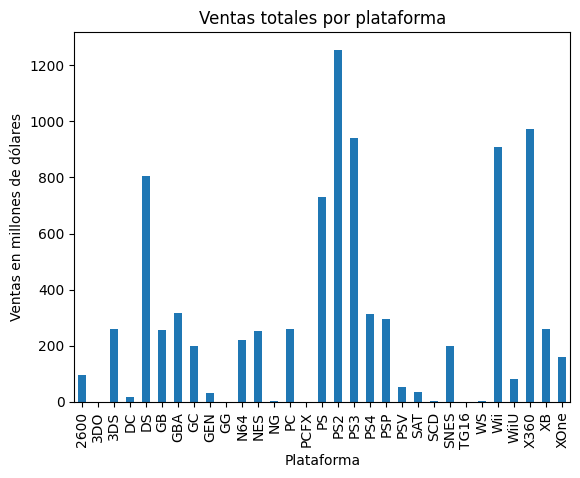

In [29]:
# Realizamos gráfico de barras para visualizar los datos 
platform_games.plot(y= 'total_sales',
                    x= 'platform',
                   title= 'Ventas totales por plataforma',
                   ylabel= 'Ventas en millones de dólares',
                   xlabel= 'Plataforma',
                   kind= 'bar',
                   legend= False)
plt.show()
                   

**Observaciones**

* La plataforma con mayores ventas fue PS2, seguido de X360, PS3, Wii y DS.
* Las plataformas que no llegaron al millón de doláres entre todas las regiones fueron TG16, 3DO, GG y PCFX
* El promedio de ventas por plataforma fue de 287 millones de dólares

### Análisis por plataforma y año

In [30]:
# Filtramos las 9 plataformas con ventas mayores al promedio de 287 millones de dólares y de los últumos 6 años
main_platform = ['DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360']
game_year_plat = df_games[df_games['platform'].isin(main_platform)][['platform','total_sales', 'year_of_release']]
game_year_plat = game_year_plat[game_year_plat['year_of_release'] >= 2011] 
pivot_year = game_year_plat.pivot_table(index='year_of_release',
                            columns='platform',
                            values='total_sales',
                            aggfunc='sum'
                           )
print(pivot_year)

platform            DS   PS2     PS3     PS4    PSP    Wii    X360
year_of_release                                                   
2011.0           26.33  0.45  157.98     NaN  17.82  59.79  145.23
2012.0           11.67   NaN  108.28     NaN   7.95  22.94  100.72
2013.0            1.54   NaN  113.25   25.99   3.38   8.59   88.58
2014.0             NaN   NaN   47.76  100.00   0.24   3.75   34.74
2015.0             NaN   NaN   16.82  118.90   0.12   1.14   11.96
2016.0             NaN   NaN    3.60   69.25    NaN   0.18    1.52


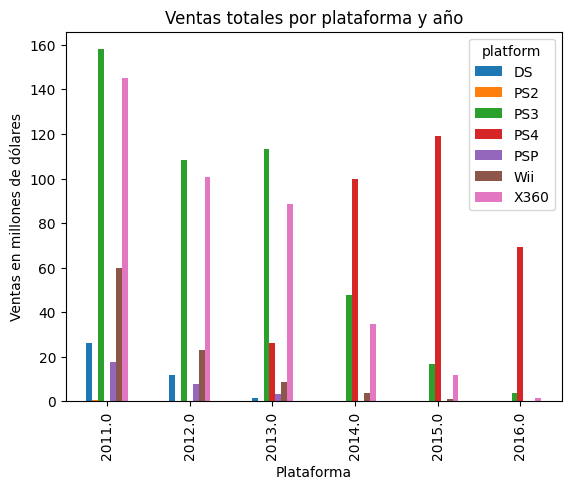

In [31]:
# Realizamos un gráfico para mayor visualización
pivot_year.plot(title= 'Ventas totales por plataforma y año',
                ylabel= 'Ventas en millones de dólares',
                xlabel= 'Plataforma',
                kind= 'bar')
plt.show()
               

**Observaciones**

* Hemos delimitado el análisis de sólo 9 plataformas, las cuales sobrepasaron el promedio de ventas totales, de igual forma analizando sólo los últimos 5 años además de 2016. 
* Podemos notar que durante 2011, 2012 y 2013 **PS3** fue líder en ventas, pero a partir de 2014 su nueva versión **PS4** lo sustituye. 
* En el caso de **X360** en 2011, 2012 y 2013 estaba muy cerca en ventas con **PS3** sin embargo, después de la aparición de **PS4** en 2014 sus ventas redujeron. 

In [32]:
# De igual forma obtenemos la relación de ventas según la plataforma y el año totales
pivot_data = df_games.pivot_table(index='year_of_release',
                            columns='platform',
                            values='total_sales',
                            aggfunc='sum'
                           )
pd.options.display.max_columns = None
print(pivot_data)

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980.0           11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981.0           35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1982.0           28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1983.0            5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1984.0            0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1985.0            0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
1986.0            0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1987.0            1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1988.0            0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
1989.0            0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   
1990.0             NaN   NaN

**Observaciones**

* En promedio por plataforma se lanzaron juegos durante 7 años consecutivos y en promedio nacen nuevas plataformas cada 2 años 
* De las plataformas que generaron ventas antes de los años 2000 y desaparecieron tenemos a 2600, 3DO, GEN, GG, NES, NG, PCFX, SAT, SCD, SNES y TG16. 
     * Siendo las más populares 2600, NES, y SNES, generaron ventas durante al menos 10 años consecutivos. 
     * Siendo las menos populares 3DO, GG, NG, PCFX, SCD y TG16 quienes generaron ventas durante menos de 5 años consecutivos. 
* La plataforma que se ha mantenido generando ventas desde su primer año de lanzamiento en 1985 es PC. 
* Las plataformas que aparecieron después de 2000 y ya dejaron de generar ventas son DS, GBA,GC, PS, PS2, WS y XB. 
* Las plataformas que aun siguen generando ventas hasta este año son 3DS, PC, PS3, PS4,PSV, Wii, WiiU, X360, XOne

### Análisis de plataformas relevantes 

* Teniendo en cuenta que en el periodo de 2006 a 2011 fueron los años en los que más se sacaron juegos nuevos, tomaremos en cuenta los años después del 2011, por lo que nuestro análisis será a partir del 2012.
* Además descartaremos las plataformas que sus ventas estén por debajo del promedio de ventas (287 millones de dólares) y que ya dejaron de generar más ventas o lanzamientos en este periodo a partir del 2012. 
* Teniendo en cuenta que las plataformas con mayores ventas son PS2, X360, PS3, Wii y DS:
    * Es interesante notar que a pesar que PS2 es la plataforma con mayores ventas, desde el 2012 ya no ha generado más ventas, de igual forma DS desde el 2014 ha dejado de generar ventas. 
    * Sin embargo las otras 3 plataformas X360, PS3 y Wii hasta este año continuan generando ventas, por lo que son las plataformas más rentables. 


In [33]:
# Dividimos las plataformas a partir del año 2012
platforms_analyzed = {
    'retro': ['2600', '3DO', 'DC', 'GB', 'GBA', 'GEN', 'GC', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2' 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB'],
    'modern': ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
    }
for era, platforms in platforms_analyzed.items():
    for platform in platforms:
        print(f"Era {era} - Platform {platform}")

Era retro - Platform 2600
Era retro - Platform 3DO
Era retro - Platform DC
Era retro - Platform GB
Era retro - Platform GBA
Era retro - Platform GEN
Era retro - Platform GC
Era retro - Platform GG
Era retro - Platform N64
Era retro - Platform NES
Era retro - Platform NG
Era retro - Platform PCFX
Era retro - Platform PS
Era retro - Platform PS2SAT
Era retro - Platform SCD
Era retro - Platform SNES
Era retro - Platform TG16
Era retro - Platform WS
Era retro - Platform XB
Era modern - Platform 3DS
Era modern - Platform DS
Era modern - Platform PC
Era modern - Platform PS3
Era modern - Platform PS4
Era modern - Platform PSP
Era modern - Platform PSV
Era modern - Platform Wii
Era modern - Platform WiiU
Era modern - Platform X360
Era modern - Platform XOne


In [34]:
# Creamos el filtro en el DataFrame para trabajar con los datos solo de las plataformas que nos interesan a partir del año 2001
modern_platform = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
df_games_mod = df_games[df_games['platform'].isin(modern_platform)][['name','platform','total_sales','critic_score','user_score','genre','na_sales','eu_sales','jp_sales','rating', 'year_of_release']]
df_games_mod = df_games_mod[df_games_mod['year_of_release'] >= 2012][['name','platform','total_sales','critic_score','user_score','genre','na_sales','eu_sales','jp_sales','rating', 'year_of_release']]
print(df_games_mod)

                                name platform  total_sales critic_score  \
16                Grand Theft Auto V      PS3        21.05         97.0   
23                Grand Theft Auto V     X360        16.27         97.0   
31         Call of Duty: Black Ops 3      PS4        14.63                
33               Pokemon X/Pokemon Y      3DS        14.60                
34        Call of Duty: Black Ops II      PS3        13.79         83.0   
...                              ...      ...          ...          ...   
16703               Strawberry Nauts      PSV         0.01                
16707               Aiyoku no Eustia      PSV         0.01                
16710  Samurai Warriors: Sanada Maru      PS3         0.01                
16712        Haitaka no Psychedelica      PSV         0.01                
16714            Winning Post 8 2016      PSV         0.01                

      user_score         genre  na_sales  eu_sales  jp_sales rating  \
16           8.2        Acti

#### Ventas globales por plataforma

platform
X360    0.807891
PS4     0.801378
Wii     0.665455
XOne    0.645020
PS3     0.586457
WiiU    0.559116
3DS     0.491209
DS      0.412812
PC      0.249059
PSV     0.119659
PSP     0.066800
Name: total_sales, dtype: float64

platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
WiiU     82.19
PC       63.51
PSV      49.18
Wii      36.60
DS       13.21
PSP      11.69
Name: total_sales, dtype: float64


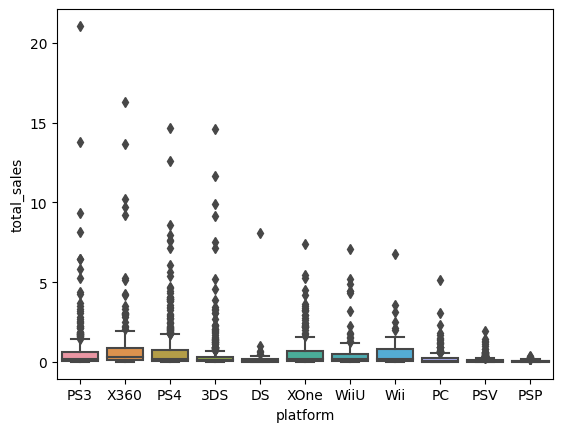

In [35]:
# Creamos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma
sns.boxplot(x= 'platform',
            y= 'total_sales',
            data= df_games_mod)
average_sales_plat = df_games_mod.groupby('platform')['total_sales'].mean()
print(average_sales_plat.sort_values(ascending=False))
print()
total_sales_mod = df_games_mod.groupby('platform')['total_sales'].sum()
print(total_sales_mod.sort_values(ascending=False))

**Comentarios** 

* Podemos observar que la plataforma **PS3** tiene más valores atípicos, lo que es curioso es que debido a esa venta atípica, pareciera que tiene mayores ventas, sin embargo el líder en ventas es **PS4**
* Todos las plataformas presentan un sesgo a la derecha, con más valores por sobre su media. 
* Vemos que para todas las plataformas sus juegos vendieron en promedio menos de 1 millón de dólares:
    * La plataforma X360 tiene el mayor promedio de ventas por juego
    * La plataforma PSP tiene el menor promedio de ventas por juego


#### Plataforma X360

**Evaluar cómo afectan las ventas de acuerdo a las reseñas de los usuarios y de los críticos**

Elegimos esta plataforma ya que es la segunda con mayor ventas, continua teniendo ventas hasta este año, y lleva 12 años en el mercado, por lo que podemos evaluar un buen rango. 

In [36]:
# Primero descartamos los valores tbd, para poder sacar estadísticas 
df_games_mod['user_score'] = df_games_mod['user_score'].where(df_games_mod['user_score'] != 'tbd', '')
df_games_mod['user_score'] = pd.to_numeric(df_games_mod['user_score'])
df_games_mod['critic_score'] = pd.to_numeric(df_games_mod['critic_score'])
print(df_games_mod.dtypes)

name                object
platform            object
total_sales        float64
critic_score       float64
user_score         float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
rating              object
year_of_release    float64
dtype: object


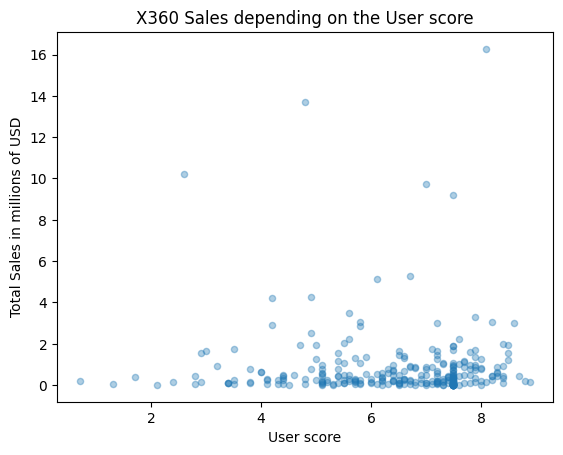

El coeficiente de relación es: -0.02284542196429197


In [37]:
# Filtramos con los datos de la plataforma X360
df_games_x360 = df_games_mod[df_games_mod['platform'] == 'X360']

# Creamos un gráfico de dispersión según las reseñas del usuario
df_games_x360.plot(x= 'user_score',
        y= 'total_sales',
        title='X360 Sales depending on the User score',
        alpha= 0.36,
        xlabel= 'User score',
        ylabel= 'Total Sales in millions of USD',
        kind='scatter')
plt.show()

# Obtenemos el coeficiente de relación:
corr_user = df_games_x360['user_score'].corr(df_games_x360['total_sales'])
print('El coeficiente de relación es:',corr_user)

**Comentarios** 

* Podemos observar que a pesar que la mayoría de las ventas se centran en calificaciones superiores al 6, desde la calificación 4 podemos notar un aumento y en calificaciones superiores al 8, las ventas reducen.
* Por lo que la correlación es negativa, **no** hay una correlación entre las reseñas del usuario y las ventas generadas.

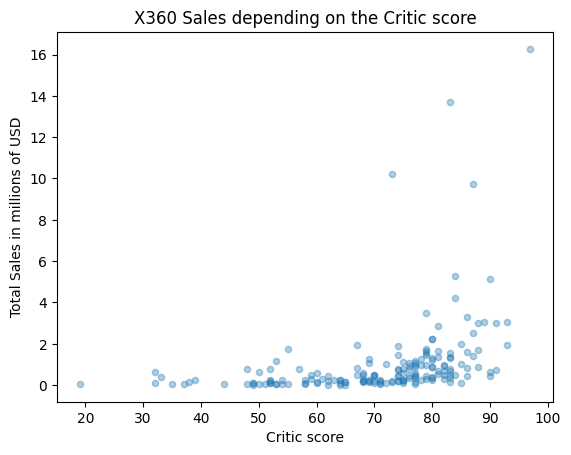

El coeficiente de relación es: 0.3602659026138049


In [38]:
# Creamos un gráfico de dispersión según las reseñas del crítico
df_games_x360.plot(x= 'critic_score',
        y= 'total_sales',
        title='X360 Sales depending on the Critic score',
        alpha= 0.36,
        xlabel= 'Critic score',
        ylabel= 'Total Sales in millions of USD',
        kind='scatter')
plt.show()

# Obtenemos el coeficiente de relación:
corr_critic = df_games_x360['critic_score'].corr(df_games_x360['total_sales'])
print('El coeficiente de relación es:',corr_critic)

**Comentarios** 

* Podemos observar que mientras mayor es la calificación vemos un aumento en las ventas, además que la mayoría de los datos se encuentran después de la calificación 60. 
* Por lo que la correlación es positiva, sí hay una correlación entre las reseñas del crítico y las ventas generadas.
* Incluso podemos ver que las mayores ventas fueron en las calificaciones mayores a 60. 

#### Ventas de los mismos juegos en otras plataformas

In [39]:
# Filtramos con los duplicados, y obtenemos el máximo de ventas según cada juego y tomamos el conteo por plataforma
same_games = df_games_mod[df_games_mod.duplicated(subset=['name'], keep=False)][['name','platform','total_sales']]
same_games_sort = same_games.groupby('name')[['platform','total_sales']].max()
print(same_games_sort['platform'].value_counts())

XOne    224
X360    164
PSV     127
PS4      39
WiiU     26
PSP      11
Wii       3
DS        3
PS3       2
Name: platform, dtype: int64


**Comentarios** 

* Podemos ver que dentro de los juegos que se encuentran en diferentes plataformas, el líder en cuanto a ventas es la plataforma **XOne**, seguido por **X360** y en tercer lugar **PSV** 
* Sin embargo teniendo en cuenta que la plataforma PS3 y DS son líderes en ventas, sorprende ver que sólo tienen 2 y 3 juegos respectivamente con el máximo de ventas. 

#### Ventas según género

genre
Action          446.41
Shooter         304.75
Role-Playing    192.80
Sports          181.07
Misc             85.28
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


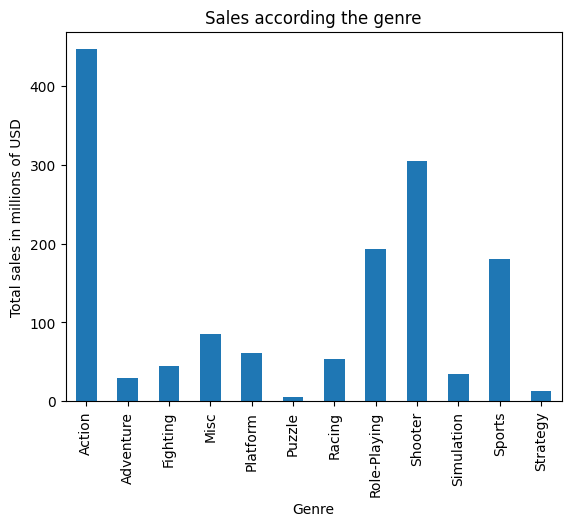

In [40]:
# Filtramos por género y sacamos las ventas totales
genre_games = df_games_mod.groupby('genre')['total_sales'].sum()
print(genre_games.sort_values(ascending=False))

genre_games.plot(x='genre',
        y= 'total_sales',
        title= 'Sales according the genre',
        xlabel= 'Genre',
        ylabel= 'Total sales in millions of USD',
        kind='bar')
plt.show()

**Observaciones**

* El género de *Action* es el que tiene más ventas, representando el 30% del total, seguido por *Shooter*, *Role Playing* y *Sports*
* Después de esos 4 géneros, ningun otro género supera los 100 millones de dólares. 
* Podemos asumir que los usuarios disfrutan más de los juegos en los cuales hay actividad física y violencia que en los que no la hay. 

### Ventas por regiones 

#### Según plataforma

##### Norteamérica

In [41]:
# Obtenemos las ventas en la región de Norteamérica
na_games = df_games_mod[['na_sales','name','platform', 'genre','rating']]
na_games_plat = na_games.groupby('platform')['na_sales'].sum()
na_games_max = na_games['na_sales'].max()
na_games_min = na_games['na_sales'].min()
na_games_avg = na_games['na_sales'].mean()
print(na_games_plat.sort_values(ascending=False))
print('El promedio de ventas en Norteamérica es:', na_games_avg)
print('El máximo de ventas en Norteamérica es:', na_games_max)
print('El mínimo de ventas en Norteamérica es:', na_games_min)
print()
main5_na = na_games_plat.sort_values(ascending=False).head()
print(main5_na)

platform
X360    140.57
PS4     108.74
PS3     103.74
XOne     93.12
3DS      55.49
WiiU     38.10
PC       19.26
Wii      18.14
PSV      10.98
DS        4.93
PSP       0.23
Name: na_sales, dtype: float64
El promedio de ventas en Norteamérica es: 0.20465677819937908
El máximo de ventas en Norteamérica es: 9.66
El mínimo de ventas en Norteamérica es: 0.0

platform
X360    140.57
PS4     108.74
PS3     103.74
XOne     93.12
3DS      55.49
Name: na_sales, dtype: float64


##### Europa

In [42]:
# Obtenemos las ventas en la región de Europa
eu_games = df_games_mod[['eu_sales','name','platform', 'genre','rating']]
eu_games_plat = eu_games.groupby('platform')['eu_sales'].sum()
eu_games_max = eu_games['eu_sales'].max()
eu_games_min = eu_games['eu_sales'].min()
eu_games_avg = eu_games['eu_sales'].mean()
print(eu_games_plat.sort_values(ascending=False))
print('El promedio de ventas en Europa es:', eu_games_avg)
print('El máximo de ventas en Europa es:', eu_games_max)
print('El mínimo de ventas en Europa es:', eu_games_min)
print()
main5_eu = eu_games_plat.sort_values(ascending=False).head()
print(main5_eu)

platform
PS4     141.09
PS3     107.27
X360     74.89
XOne     51.59
3DS      42.83
PC       38.38
WiiU     25.13
Wii      12.34
PSV      11.36
DS        3.78
PSP       0.52
Name: eu_sales, dtype: float64
El promedio de ventas en Europa es: 0.17563987581924803
El máximo de ventas en Europa es: 9.09
El mínimo de ventas en Europa es: 0.0

platform
PS4     141.09
PS3     107.27
X360     74.89
XOne     51.59
3DS      42.83
Name: eu_sales, dtype: float64


##### Japón

In [43]:
# Obtenemos las ventas en la región de Japón
jp_games = df_games_mod[['jp_sales','name','platform', 'genre','rating']]
jp_games_plat = jp_games.groupby('platform')['jp_sales'].sum()
jp_games_max = jp_games['jp_sales'].max()
jp_games_min = jp_games['jp_sales'].min()
jp_games_avg = jp_games['jp_sales'].mean()
print(jp_games_plat.sort_values(ascending=False))
print('El promedio de ventas en Japón es:', jp_games_avg)
print('El máximo de ventas en Japón es:', jp_games_max)
print('El mínimo de ventas en Japón es:', jp_games_min)
print()
main5_jp = jp_games_plat.sort_values(ascending=False).head()
print(main5_jp)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.71
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64
El promedio de ventas en Japón es: 0.06651259054846499
El máximo de ventas en Japón es: 4.39
El mínimo de ventas en Japón es: 0.0

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


In [44]:
# Obtenemos las 5 plataformas por cada región con las mayores ventas 
main5_region = pd.concat([main5_na, main5_eu, main5_jp], axis = 'columns')
main5_region = main5_region.fillna(0)
main5_region['total_sales'] = main5_region['na_sales'] + main5_region['eu_sales'] + main5_region['jp_sales']
print(main5_region.sort_values(by='total_sales', ascending=False))
print()
print('El total de las 5 plataformas principales de Norteamérica es:', main5_region['na_sales'].sum().round(2))
print('El total de las 5 plataformas principales de Europa es:', main5_region['eu_sales'].sum().round(2))
print('El total de las 5 plataformas principales de Japón es:', main5_region['jp_sales'].sum().round(2))

          na_sales  eu_sales  jp_sales  total_sales
platform                                           
PS4         108.74    141.09     15.96       265.79
PS3         103.74    107.27     35.29       246.30
X360        140.57     74.89      0.00       215.46
3DS          55.49     42.83     87.79       186.11
XOne         93.12     51.59      0.00       144.71
PSV           0.00      0.00     21.04        21.04
WiiU          0.00      0.00     13.01        13.01

El total de las 5 plataformas principales de Norteamérica es: 501.66
El total de las 5 plataformas principales de Europa es: 417.67
El total de las 5 plataformas principales de Japón es: 173.09


**Comentarios**

* En la región de Norteamérica la plataforma con mayores ventas es X360. 
* En la región de Europa la plataforma con mayores ventas es PS4
* En la región de Japón la plataforma con mayores ventas es 3DS. 
* Podemos ver que en las 3 regiones coinciden las plataformas PS4, PS3 y 3DS:
    * Para PS4 sus mayores ventas vienen de Europa comparando con las otras regiones, siendo la plataforma con mayores ventas con 265.79 millones de dólares. 
    * Para PS3 sus mayores ventas también vienen de Europa, con un total de 246.39 millones de dólares ocupa el segundo lugar. 
    * Para 3DS sus mayores ventas vienen de Japón, con un total de 186.11 millones de dólares, ocupa el tercer lugar.
* Observamos que el terce lugar de ventas lo ocupa X360, sin embargo no entra en los 5 más populares en Japón.
* Observamos que en la región de Japón las plataformas de PSV y WiiU estuvieron dentro de las 5 plataformas principales, sin embargo en las otras 2 regiones no figuraron. 
* En orden de mayores ventas por plataforma:
    1. Norteamérica con 501.66 millones de dólares 
    2. Europa con 417.67 millones de dólares
    3. Japón con 173.09 millones de dólares

#### Según el género

##### Norteamérica

In [45]:
# Obtenemos las ventas en la región de Norteamérica
na_games_genre = na_games.groupby('genre')['na_sales'].sum()
print(na_games_genre.sort_values(ascending=False))
print()
main_genre_na = na_games_genre.sort_values(ascending=False).head()
print(main_genre_na)

genre
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

genre
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64


##### Europa

In [46]:
# Obtenemos las ventas en la región de Europa
eu_games_genre = eu_games.groupby('genre')['eu_sales'].sum()
print(eu_games_genre.sort_values(ascending=False))
print()
main_genre_eu = eu_games_genre.sort_values(ascending=False).head()
print(main_genre_eu)

genre
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

genre
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64


##### Japón

In [47]:
# Obtenemos las ventas en la región de Japón
jp_games_genre = jp_games.groupby('genre')['jp_sales'].sum()
print(jp_games_genre.sort_values(ascending=False))
print()
main_genre_jp = jp_games_genre.sort_values(ascending=False).head()
print(main_genre_jp)

genre
Role-Playing    65.44
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Racing           2.50
Puzzle           2.14
Name: jp_sales, dtype: float64

genre
Role-Playing    65.44
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


In [48]:
# Obtenemos los 5 géneros por cada región con las mayores ventas 
main_genre_region = pd.concat([main_genre_na, main_genre_eu, main_genre_jp], axis = 'columns')
main_genre_region = main_genre_region.fillna(0)
main_genre_region['total_sales'] = main_genre_region['na_sales'] + main_genre_region['eu_sales'] + main_genre_region['jp_sales']
print(main_genre_region.sort_values(by='total_sales', ascending=False))
print()
print('El total de los 5 géneros principales de Norteamérica es:', main_genre_region['na_sales'].sum().round(2))
print('El total de los 5 géneros principales de Europa es:', main_genre_region['eu_sales'].sum().round(2))
print('El total de los 5 géneros principales de Japón es:', main_genre_region['jp_sales'].sum().round(2))

              na_sales  eu_sales  jp_sales  total_sales
genre                                                  
Action          180.15    161.70     52.80       394.65
Shooter         144.79    113.47      0.00       258.26
Role-Playing     64.00     48.53     65.44       177.97
Sports           81.53     69.09      0.00       150.62
Misc             38.19      0.00     13.10        51.29
Racing            0.00     27.29      0.00        27.29
Simulation        0.00      0.00     10.41        10.41
Fighting          0.00      0.00      9.44         9.44

El total de los 5 géneros principales de Norteamérica es: 508.66
El total de los 5 géneros principales de Europa es: 420.08
El total de los 5 géneros principales de Japón es: 151.19


**Comentarios**

* Tanto en Norteamérica como en Europa, el género con mayores ventas es *Action*
* En la región de Japón el género con mayores ventas es *Role-Playing*. 
* Podemos ver que en las 3 regiones coinciden los géneros de *Action* y *Role Playing*:
    * Para *Action* sus mayores ventas vienen de Norteamérica comparando con las otras regiones, siendo la plataforma con mayores ventas con 394.65 millones de dólares. 
    * Para *Role Playing* sus mayores ventas vienen de Japón, con un total de 177.97 millones de dólares ocupa el tercer lugar. 
* Para el caso de *Shooter* sus mayores ventas también vienen de Norteamérica, con un total de 258.26 millones de dólares, ocupa el segundo lugar, sin embargo en Japón no figura en los 5 más populares.
* Observamos que el género *Racing* es de los 5 principales en Europa, pero no lo es en las otras regiones, talvez de deba a la influencia de la Formula 1 en Europa
* Observamos que los géneros *Simulation* y *Fighting* son de los 5 principales en Japón, pero no lo son en las otras regiones.
* En orden de mayores ventas por género:
    1. Norteamérica con 508.66 millones de dólares 
    2. Europa con 420.08 millones de dólares
    3. Japón con 151.19 millones de dólares

#### Según rating

##### Norteamérica

In [49]:
# Obtenemos las ventas en la región de Norteamérica
na_games_rat = na_games.groupby('rating')['na_sales'].sum()
print(na_games_rat.sort_values(ascending=False))

rating
M       231.67
E       114.37
        103.31
E10+     77.93
T        66.02
Name: na_sales, dtype: float64


##### Europa

In [50]:
# Obtenemos las ventas en la región de Europa
eu_games_rat = eu_games.groupby('rating')['eu_sales'].sum()
print(eu_games_rat.sort_values(ascending=False))

rating
M       194.44
E       113.03
         91.50
E10+     57.25
T        52.96
Name: eu_sales, dtype: float64


##### Japón

In [51]:
# Obtenemos las ventas en la región de Japón
jp_games_rat = jp_games.groupby('rating')['jp_sales'].sum()
print(jp_games_rat.sort_values(ascending=False))

rating
        109.08
E        28.33
T        26.02
M        21.20
E10+      8.19
Name: jp_sales, dtype: float64


In [52]:
# Hacemos una comparación de las 3 regiones
rating_region = pd.concat([na_games_rat, eu_games_rat, jp_games_rat], axis = 'columns')
rating_region['total_sales'] = rating_region['na_sales'] + rating_region['eu_sales'] + rating_region['jp_sales']
rating_region = rating_region.reset_index()
rating_region = rating_region.drop(0)
print(rating_region.sort_values(by='total_sales', ascending=False))

  rating  na_sales  eu_sales  jp_sales  total_sales
3      M    231.67    194.44     21.20       447.31
1      E    114.37    113.03     28.33       255.73
4      T     66.02     52.96     26.02       145.00
2   E10+     77.93     57.25      8.19       143.37


**Comentarios**

* Teniendo en cuenta los valores del rating: 
    * E = Apto para todas las edades 
    * M = Apto para mayores de 17 años
    * T = Apto para mayores de 13 años
    * E10+ = Apto para mayores de 10 años
    * EC = Apto para mayores de 3 años
    * RP = Rating pendiente
* Podemos observar que en las regiones de Norteamérica y Europa la clasificación apta para mayores de 17 años son las más populares. 
* En cambio para Japón los juegos que se clasifican para todas las edades son los líderes en ventas
* Para el caso de la clasificación *E* ocupan el segundo lugar de mayores ventas tanto Norteamérica y Europa, sin embargo en Japón es la clasificación *T*
* Podemos suponer que estas diferencias son debido al rango de edades en las regiones, para lo cual tendríamos que saber las edades de los usuarios.
* Podemos generalizar que en volumen de ventas los juegos más populares son los juegos para mayores de 17 años
* Los juegos que son para menores de 10 años o que tienen el rating pendiente no figuran en las plataformas analizadas en el periodo después de 2012.  

## Hipótesis

### Según plataforma

**1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas**

In [53]:
# Generamos nuestras variables por cada plataforma para poder aplicar la hipótesis
dfgame_xone = df_games_mod.query("platform == 'XOne'")['user_score']
dfgame_xone = dfgame_xone.dropna()
print(dfgame_xone)
print()
dfgame_pc = df_games_mod.query("platform == 'PC'")['user_score']
dfgame_pc = dfgame_pc.dropna()
print(dfgame_pc)
df_xone_avg = dfgame_xone.mean()  
df_pc_avg = dfgame_pc.mean() 
print('La calificación promedio del usuario de la plataforma Xone es:', df_xone_avg)
print('La calificación promedio del usuario de la plataforma PC es:', df_pc_avg)

99       7.5
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16597    6.0
16630    8.2
16643    6.6
16645    7.5
16660    6.7
Name: user_score, Length: 236, dtype: float64

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16584    7.9
16617    7.5
16631    7.5
16678    7.5
16692    7.6
Name: user_score, Length: 250, dtype: float64
La calificación promedio del usuario de la plataforma Xone es: 6.745338983050848
La calificación promedio del usuario de la plataforma PC es: 6.61


In [54]:
# Sacamos la varianza y desviación estándar
var_xone = np.var(dfgame_xone)
print('La varianza de la plataforma Xone según la calificación del usuario es:', var_xone)
var_pc = np.var(dfgame_pc)
print('La varianza de la plataforma PC según la calificación del usuario es:', var_pc)
print()
dev_xone =np.sqrt(var_xone)
print('La desviación estándar de la plataforma Xone según la calificación del usuario es:', dev_xone)
dev_pc =np.sqrt(var_pc)
print('La desviación estándar de la plataforma PC según la calificación del usuario es:', dev_pc)

La varianza de la plataforma Xone según la calificación del usuario es: 1.6315460715311692
La varianza de la plataforma PC según la calificación del usuario es: 2.4540199999999994

La desviación estándar de la plataforma Xone según la calificación del usuario es: 1.2773198783120732
La desviación estándar de la plataforma PC según la calificación del usuario es: 1.5665311998169713


In [55]:
# Probamos la hipótesis
alpha = 0.05
results = st.ttest_ind(dfgame_xone, dfgame_pc, equal_var=False)
print('valor p: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.2969170114442903
No podemos rechazar la hipótesis nula


**Nuestra hipótesis nula es: La calificación promedio de los usuarios de las plataformas Xone y PC son iguales.**

**Nuestra hipótesis alternativa es: La calificación de XOne es mayor que la de PC.**

* Después de comprobar nuestra hipótesis podemos confirmar que existe un 29% que la calificación del usuario sea la misma para ambas plataformas, por lo que no podemos rechazar nuestra hipótesis nula. 
* Confirmamos que la calificación de XOne es menor que la de PC, por lo que confirmamos la hipótesis alternativa. 

* Hemos decidido plantear la hipótesis nula como igualdad ya que basado en su promedio estaban muy cercanos en valor. 
* En cuanto a la alternativa, hemos decidido hacerla con valor mayor en Xone, ya que esta plataforma tuvo mayores ventas que PC:
    * XOne    159.32
    * PC       63.51

### Según género

**2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

In [56]:
# Generamos nuestras variables por cada género para poder aplicar la hipótesis
dfgame_action = df_games_mod.query("genre == 'Action'")['user_score']
dfgame_action = dfgame_action.dropna()
print(dfgame_action)
print()
dfgame_sports = df_games_mod.query("genre == 'Sports'")['user_score']
dfgame_sports = dfgame_sports.dropna()
print(dfgame_sports)
df_action_avg = dfgame_action.mean()  
df_sports_avg = dfgame_sports.mean() 
print('La calificación promedio del usuario del género de Acción es:', df_action_avg)
print('La calificación promedio del usuario del género de Deportes es:', df_sports_avg)

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16680    7.5
16691    7.5
16692    7.6
16699    7.5
16710    7.5
Name: user_score, Length: 991, dtype: float64

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16241    7.5
16428    7.5
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 249, dtype: float64
La calificación promedio del usuario del género de Acción es: 7.143289606458123
La calificación promedio del usuario del género de Deportes es: 5.899196787148595


In [57]:
# Sacamos la varianza y desviación estándar
var_action = np.var(dfgame_action)
print('La varianza del género Acción según la calificación del usuario es:', var_action)
var_sports = np.var(dfgame_sports)
print('La varianza del género Deportes según la calificación del usuario es:', var_sports)
print()
dev_action =np.sqrt(var_action)
print('La desviación estándar del género Acción según la calificación del usuario es:', dev_action)
dev_sports =np.sqrt(var_sports)
print('La desviación estándar del género Deportes según la calificación del usuario es:', dev_sports)

La varianza del género Acción según la calificación del usuario es: 1.1167032047254757
La varianza del género Deportes según la calificación del usuario es: 3.0648186319575488

La desviación estándar del género Acción según la calificación del usuario es: 1.0567417871578069
La desviación estándar del género Deportes según la calificación del usuario es: 1.750662340932011


In [58]:
# Probamos la hipótesis
alpha = 0.05
results = st.ttest_ind(dfgame_action, dfgame_sports, equal_var=False)
print('valor p: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  7.794701646310851e-23
Rechazamos la hipótesis nula


**Nuestra hipótesis nula es: La calificación promedio de los usuarios de los géneros de Acción y Deportes son iguales.**

**Nuestra hipótesis alternativa es: La calificación del género de Acción es mayor que la de Deportes.**

* Después de comprobar nuestra hipótesis podemos confirmar que existe menos de 0.001% que la calificación del usuario sea la misma para ambos géneros. 
* Confirmamos que la calificación de Acción es mayor que la de Deportes, por lo que confirmamos la hipótesis alternativa. 

* Hemos decidido plantear la hipótesis nula como igualdad 
* En cuanto a la alternativa, hemos decidido hacerla con valor mayor en Acción, ya que este género tuvo mayores ventas que Deportes:
    * Action          446.41
    * Sports          181.07

## Conclusiones

* Después de nuestro análisis podemos concluir que las plataformas más prometedoras para el siguiente año son:
    * PS4
    * X360
    * PS3
    * XOne
    * 3DS
* Hemos tomado en cuenta el número de juegos que lanzaron, sus promedios de ventas, sus ventas totales y la popularidad en las 3 regiones. 

* Es importante mencionar que omitimos PS2 y Wii a pesar de ser líderes en ventas, abrimos paso a las nuevas geeraciones de plataformas que actualmente son las que generan más ventas. 

* Podemos confirmar que la región que genera mayores ventas es en Norteamérica, por lo que podemos enfocar la publicidad en esta región. 

* Podemos confirmar que las calificaciones de los usuarios y críticos afectan las ventas, los usuarios probablemente toman en cuenta las calificaciones para las ventas. En este caso queremos notar que es importante conocer los resultados TBD para poder evaluar si afectan nuestro análisis de forma significativa. 

* Teniendo en cuenta que este año se lanzaron 502 juegos, y nuestro promedio de lanzamiento es de 451, podemos esperar que en el 2017 se lancen más de 400 juegos. 

* En las regiones de Norteamérica podemos impulsar la publicidad para los juegos con rating *M* (Apto para mayores de 17 años) y en Japón los juegos con rating *E* (apto para todas las edades). 

* En las 3 regiones podemos impulsar la publicidad para los juegos del género de Acción.
